ARBOLES DE DECISIÓN

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset
file_path = 'Titanic-Dataset.csv'  
data = pd.read_csv(file_path)

Explorar los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.7+ KB
None
        PassengerId    Survived      Pclass                     Name  \
count    891.000000  891.000000  891.000000                      891   
unique          NaN         NaN         NaN                      891   
top             NaN         NaN         NaN  Braund, Mr

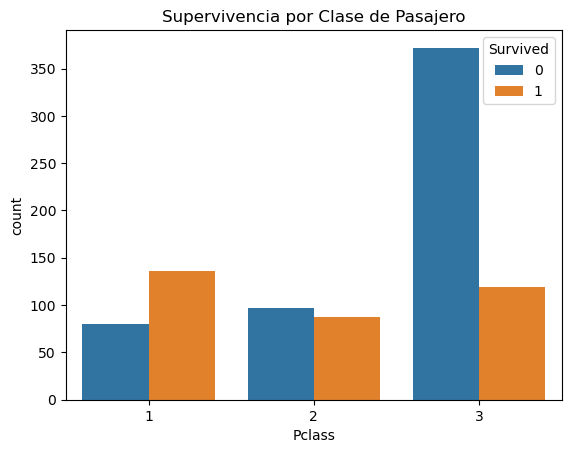

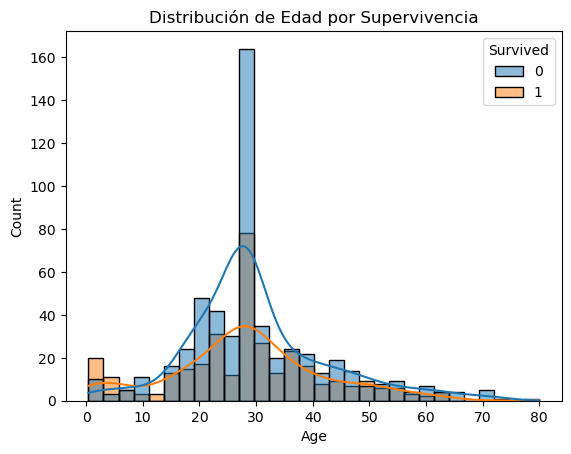

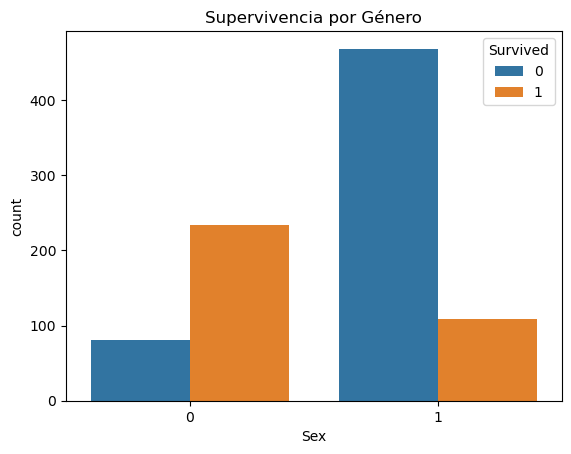

In [5]:
print(data.info())
print(data.describe(include='all'))
print(data.isnull().sum())

# Visualizaciones iniciales
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Supervivencia por Clase de Pasajero')
plt.show()

sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribución de Edad por Supervivencia')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Supervivencia por Género')
plt.show()

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputar valores faltantes en 'Age' con la mediana
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

# Rellenar valores faltantes en 'Embarked' con el valor más frecuente
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

# Eliminar la columna 'Cabin' por tener demasiados valores faltantes
data.drop(columns=['Cabin'], inplace=True)

# Codificar variables categóricas
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Verificar valores faltantes restantes
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Seleccionar características relevantes

In [6]:
# Seleccionar las columnas relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']


Dividir en conjuntos de entrenamiento y prueba

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenar el modelo

In [8]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Imprimir los hiperparámetros utilizados
print(model.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Evaluar el modelo

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



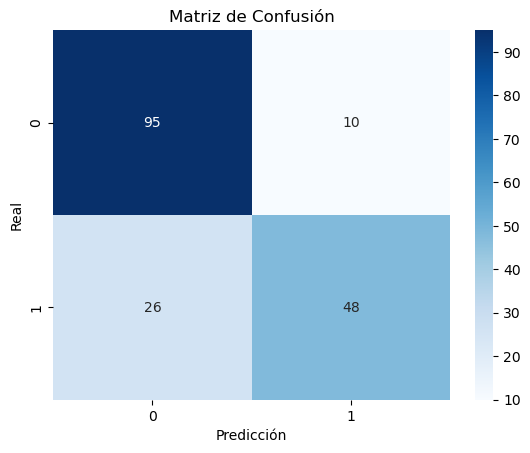

Precisión del modelo: 0.80


In [10]:
# Predicciones
y_pred = model.predict(X_test)

# Reporte de métricas
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Precisión general
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


 Visualización de resultados

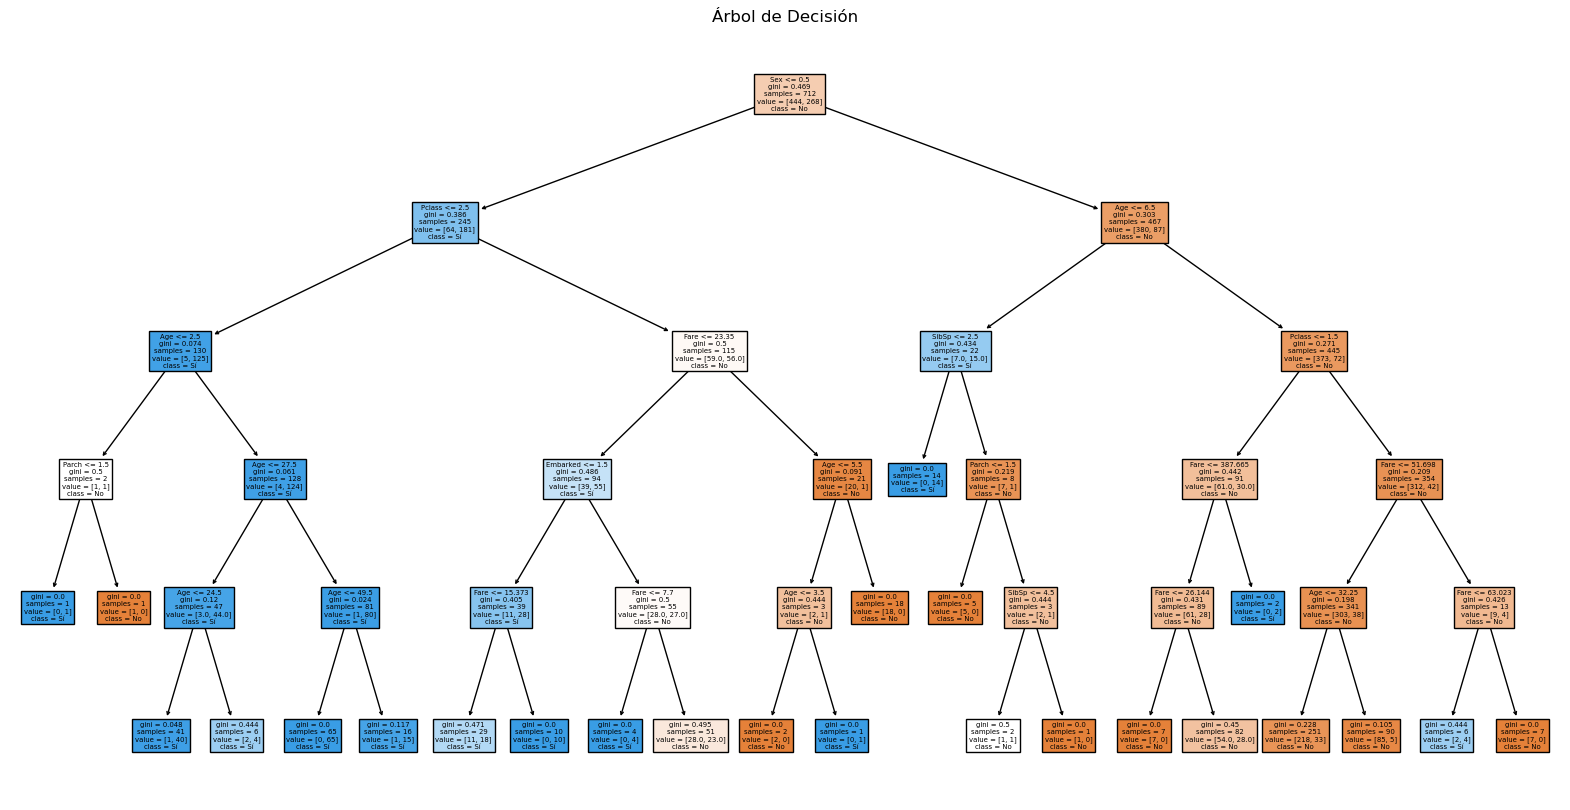

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['No', 'Sí'], filled=True)
plt.title("Árbol de Decisión")
plt.show()
